# Introduction to PyTorch

Pytorch is a popular neural net framework with the following features:
*   Automatic differentation
*   Compiling computation graphs
*   Libraries of algorithms and network primitives. Provides a high-level abstractions for working with neural networks.
*   Support for graphics processing units (GPU)






In this lesson, we will learn the basics of PyTorch. We will cover the following topics:

1. Tensors
2. Automatic differentation
3. Building a simple neural network
4. PyTorch Datasets and DataLoaders
5. Visualizing examples from the FashionMNIST Dataset
6. Training on CPU
7. Training on GPU
8. Using pre-trained weights

## 1. Tensors
Tensors are a specialized data structure very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model's parameters.

Tensors are similar to NumPy's ndarrays, except that tensors can run on GPUs or other hardware accelerators.

### Initializing a Tensor

In [ ]:
import torch
import numpy as np
import math

# Create a tensor directly from data
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("x:", x)

# Create a tensor of zeros
y = torch.zeros(2, 2)
print("y:", y)

# Create a tensor of ones
z = torch.ones(2, 2)
print("z:", z)

# Create a random tensor
w = torch.rand(2, 2)
print("w:", w)

# Create a tensor from a NumPy array
np_array = np.array([1,2,3])
x_np = torch.from_numpy(np_array)
print("x_np:", x_np)

x: tensor([[1., 2.],
        [3., 4.]])
y: tensor([[0., 0.],
        [0., 0.]])
z: tensor([[1., 1.],
        [1., 1.]])
w: tensor([[0.1882, 0.4824],
        [0.4714, 0.7578]])
x_np: tensor([1, 2, 3])


### Attributes of a tensor


In [ ]:
tensor = torch.tensor([[1, 2, 3], [3, 4, 5]])

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


### Operations on Tensors



In [ ]:
# Move the tensor to GPU if available
if torch.cuda.is_available():
  tensor = tensor.to("cuda")

# Standard numpy-like indexing and slicing
tensor = torch.tensor([[1,2,3], [3,4,5]])
print("First row: ", tensor[0])
print("First column: ", tensor[:,0])

First row:  tensor([1, 2, 3])
First column:  tensor([1, 3])


In [ ]:
# Matrix multiplication
tensor = torch.ones(3, 3)
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
print("y1: ", y1)
print("y2: ", y2)

y1:  tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
y2:  tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


In [ ]:
# Element wise product
z1 = tensor * tensor
z2 = tensor.mul(tensor)
print("z1: ", z1)
print("z2: ", z2)

z1:  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
z2:  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# Reshape
a = torch.arange(4.)
a_reshaped = torch.reshape(a, (2, 2))
b = torch.tensor([[0, 1], [2, 3]])
b_reshaped =torch.reshape(b, (-1,))
print("a_reshaped", a_reshaped)
print("b_reshaped", b_reshaped)


Common functions:
tensor([[0.0135, 0.0892, 0.7419, 0.4531],
        [0.2156, 0.7355, 0.7178, 0.8542]])
tensor([[1., -0., 1., -0.],
        [-0., 1., -0., -0.]])
tensor([[ 0., -1.,  0., -1.],
        [-1.,  0., -1., -1.]])
tensor([[ 0.0135, -0.0892,  0.5000, -0.4531],
        [-0.2156,  0.5000, -0.5000, -0.5000]])
a_reshaped tensor([[0., 1.],
        [2., 3.]])
b_reshaped tensor([0, 1, 2, 3])


### Tensor Broadcasting

In [ ]:
x1 = torch.tensor([[1, 2, 3], [3, 4, 5]])
x2 = torch.tensor([2,2,2])
doubled = x1 * x2

print(doubled)

tensor([[ 2,  4,  6],
        [ 6,  8, 10]])


## 2. Automatic Differentation



-   Instead of computing backpropagation manually, an autodiff system performs backprop in a completely mechanical way.
-   An autodiff system will convert the program into a sequence of primitive operations which have specified routines for computing derivatives.

### Distinction of the concepts

-  **Backpropagation**: the mathematical algorithm we use to compute the gradient.
-  **Automatic differentiation (AutoDiff)**: any software that implements backpropagation.
  -   Examples: Autograd, TensorFlow, PyTorch, Jax, etc.
  -  **Reverse Mode AD**: A method to get exact derivatives efficiently, by storing information as you go forward that you can reuse as you go backwards



### 2.1 Autograd

* [Autograd](https://github.com/HIPS/autograd) is a Python package for automatic differentiation.

From the Autograd Github repository:

* Autograd can automatically differentiate native Python and Numpy code.
* It can handle a large subset of Python's features, including loops, conditional statements (if/else), recursion and closures.
* It can also compute higher-order derivatives.
* It uses reverse-mode differentiation (a.k.a. backpropagation) so it can efficiently take gradients of scalar-valued functions with respect to array-valued arguments.

In [ ]:
import autograd.numpy as jnp  # Import thinly-wrapped numpy
from autograd import grad  # Basicallly the only autograd function you need

In [ ]:
# Define a function like normal, using Python and (autograd's) NumPy
def tanh(x):
    y = jnp.exp(-x)
    return (1.0 - y) / (1.0 + y)


# Create a *function* that computes the gradient of tanh
grad_tanh = grad(tanh)

# Evaluate the gradient at x = 1.0
print(grad_tanh(1.0))

# Compare to numeric gradient computed using finite differences
print((tanh(1.0001) - tanh(0.9999)) / 0.0002)

0.39322386648296376
0.39322386636453377


### 2.2 PyTorch Automatic Differentiation

To compute the gradients of the loss function, PyTorch has a built-in differentiation engine called `torch.autograd` that traces the computation dynamically at runtime. It supports automatic computation of gradient for any computational graph.

- In the forward pass, `torch.autograd` runs the requested operation to compute the resulting tensor. For each primitive operation, data and the operation's gradient function are stored in the computation graph.
- In the backward pass, `torch.autograd` computes the gradients using the gradient function of each primitive operation and accumulates gradients using chain rule.



Consider the one-layer neural network below:

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

The code above defines the following computation graph:

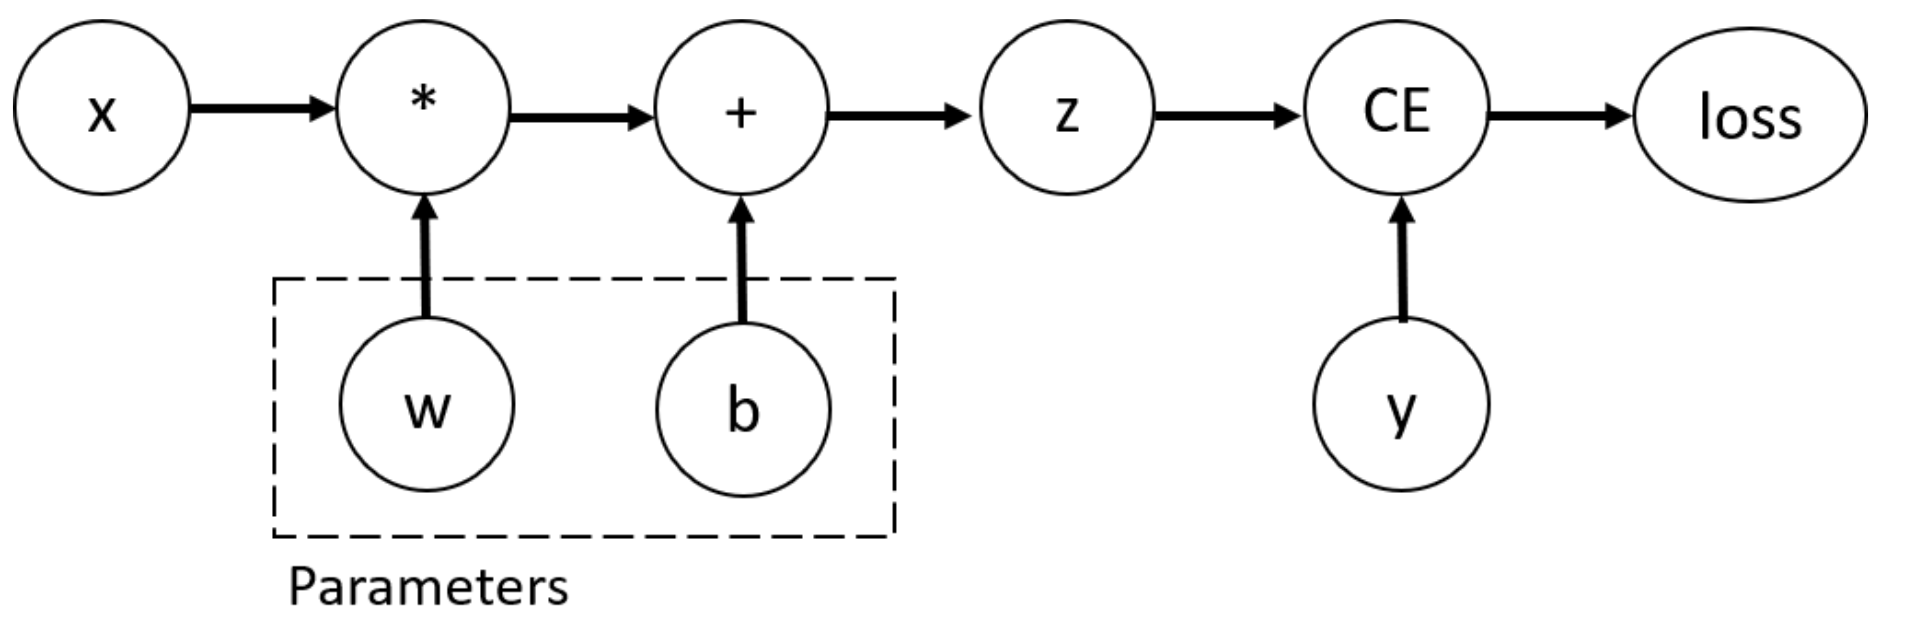

Image source: https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

We need to be able to compute the gradients of the loss function with respect to the variables `w `and `b`, so we've set the `requires_grad` property of those tensors.

**Computing Gradients**: To compute `dw`, `db`, we call `loss.backward()` and retrieve the values from `w.grad` and `b.grad`.


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1902, 0.2013, 0.3231],
        [0.1902, 0.2013, 0.3231],
        [0.1902, 0.2013, 0.3231],
        [0.1902, 0.2013, 0.3231],
        [0.1902, 0.2013, 0.3231]])
tensor([0.1902, 0.2013, 0.3231])


**Disabling gradient tracking** : When we have trained the model and just want to run inference on the test data, we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with `torch.no_grad()` block. This will help reducing memory consumption for computations. Another case where you might want to disable gradient tracking is to mark some parameters in the neural network as frozen parameters.

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


## 3. Building a simple neural network

In [ ]:
# Create an instance of the neural network
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 8, bias=False)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleNet()

In [ ]:
print(net)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Prepare some dummy data and labels
data = torch.tensor([[1., 2.], [3., 4.]], dtype=torch.float32)
labels = torch.tensor([[0.], [1.]], dtype=torch.float32)

# Train the neural network
for epoch in range(500):
    # Forward pass
    outputs = net(data)
    loss = criterion(outputs, labels)

    # IMPORTANT: Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    optimizer.step()

    # Print the loss for this epoch
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{500}], Loss: {loss.item():.4f}")


SimpleNet(
  (fc1): Linear(in_features=2, out_features=8, bias=False)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)
Epoch [100/500], Loss: 0.0754
Epoch [200/500], Loss: 0.0390
Epoch [300/500], Loss: 0.0193
Epoch [400/500], Loss: 0.0091
Epoch [500/500], Loss: 0.0042


## 4. PyTorch Datasets and DataLoaders

Datasets and DataLoaders are essential components for handling data in PyTorch. A Dataset is a collection of data, and a DataLoader helps to efficiently load the data in batches during training.

In this example, we'll use the FashionMNIST dataset, which contains 60,000 training images and 10,000 testing images of 10 different clothing items.

In [ ]:
import torchvision
import torchvision.transforms as transforms

# Define data transformations
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)

# Create DataLoaders for train and test datasets
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=512, shuffle=True, num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=512, shuffle=False, num_workers=2
)

print("Num training examples: {}".format(len(train_dataset)))
print("Num test examples: {}".format(len(test_dataset)))


# List of class labels
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

100%|██████████| 26421880/26421880 [00:01<00:00, 18489076.28it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 347931.95it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6235680.94it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11896571.35it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Num training examples: 60000
Num test examples: 10000


## 5. Visualizing Examples from the FashionMNIST Dataset

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


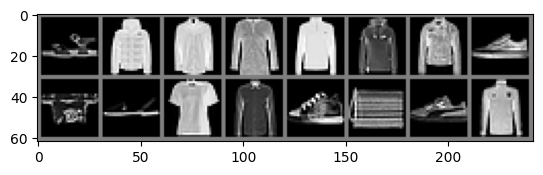

Sandal -- Coat -- Coat -- Shirt -- Pullover -- Pullover -- Coat -- Sneaker
Shirt -- Sandal -- Shirt -- Shirt -- Sneaker -- Bag -- Sneaker -- Coat


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the images in a grid along with their labels
imshow(torchvision.utils.make_grid(images[:16]))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8)))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8,16)))

With the dataset loaded and the DataLoader created, we can now train our neural network using the FashionMNIST dataset. Let's modify our previous SimpleNet example to handle 28x28 images and 10 output classes.

## 6. Training on the CPU = Slow!

In [ ]:
import torch.nn.functional as F

# Define the neural network for FashionMNIST
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the neural network
net = FashionMNISTNet()
print(net)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the neural network using the FashionMNIST dataset
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")
print("Training finished.")

FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/5], Loss: 1.8534
Epoch [2/5], Loss: 0.6555
Epoch [3/5], Loss: 0.5438
Epoch [4/5], Loss: 0.4919
Epoch [5/5], Loss: 0.4474
Training finished.


## 7. Training on the GPU = Faster!

In [ ]:
import torch.nn.functional as F

# Define the neural network for FashionMNIST
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# IMPORTANT CODE BELOW
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create an instance of the neural network
net = FashionMNISTNet()
print(net)

# Move the model to the GPU if available
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the neural network using the FashionMNIST dataset
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")
print("Training finished.")

Using device: cpu
FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/5], Loss: 1.7143
Epoch [2/5], Loss: 0.6471
Epoch [3/5], Loss: 0.5474
Epoch [4/5], Loss: 0.4971
Epoch [5/5], Loss: 0.4515
Training finished.


Now that we have trained our neural network, let's evaluate its performance on the test dataset.

In [ ]:
# Test the neural network
correct = 0
total = 0

# Set the model to evaluation mode
net.eval()

# Disable gradient calculation
with torch.no_grad():
    for inputs, labels in test_loader:

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 81.45%


Not bad!

Let's inspect number of total parameters and training parameters in the model:

In [ ]:
total_params = sum(p.numel() for p in net.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in net.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')


116,234 total parameters.
116,234 training parameters.


Now that we have a trained model, if we want to adapt the model to another dataset with only 5 classes, we can freeze earlier layers and only train on the last fully-connected layer.

In [ ]:
# Freeze earlier layers
for param in net.parameters():
    param.requires_grad = False

n_inputs = net.fc3.in_features
n_classes = 5
net.fc3 = nn.Linear(n_inputs, n_classes)
total_params = sum(p.numel() for p in net.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in net.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

115,909 total parameters.
325 training parameters.


## 8. Pre-trained weights

PyTorch has many pretrained models we can use. All of these models have been trained on Imagenet which consists of millions of images across 1000 categories. We want to freeze the early layers of these pretrained models and replace the classification module with our own.


PyTorch API for using pre-trained weights: https://pytorch.org/vision/stable/models.html

The approach for using a pre-trained image recognition model is well-established:

1. Load in pre-trained weights from a network trained on a large dataset
2. Freeze all the weights in the lower (convolutional) layers
    * Layers to freeze can be adjusted depending on similarity of task to large training dataset
3. Replace the classifier (fully connected) part of the network with a custom classifier
    * Number of outputs must be set equal to the number of classes
4. Train only the custom classifier (fully connected) layers for the task
    * Optimizer model classifier for smaller dataset


We will demonstrate an example of loading a pre-trained Resnet model.

In [ ]:
from torchvision import models

model = models.resnet50(pretrained=True)

print(model)

for param in model.parameters():
    param.requires_grad = False

n_inputs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.2),
    nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 149MB/s]
